In [2]:
#required library
from music21 import *
import music21
import os
import glob
import re
import numpy as np
import json

In [3]:
# get environment
env = environment.Environment()

# check the path
print('Environment settings:')
print('musicXML:  ', env['musicxmlPath'])
print('musescore: ', env['musescoreDirectPNGPath'])

# set path if necessary
# env['musicxmlPath'] = 'path/to/your/musicXmlApplication'
env['musescoreDirectPNGPath'] = 'C:\Program Files\MuseScore 3\\bin\MuseScore3.exe'

Environment settings:
musicXML:   C:\Program Files\MuseScore 3\bin\MuseScore3.exe
musescore:  C:\Users\good6\C:\Program Files\MuseScore 3\MuseScore.exe


In [31]:
#read file
c = converter.parse('../musicxml(ok)/Waltz_in_Eb_Major.mxl')

In [21]:
def cal_offset(e):
    if e is None:
        return 0
    return e.offset+cal_offset(e.activeSite)

In [35]:
#extract notes
all_notes=[]
for el in c.recurse().notes:
    if el.lyric is not None:
        el.lyric=el.lyric.replace('♭','b')
    
    #print(el)
    #print([el.getOffsetBySite(c),el.lyric, el, el.activeSite,el.offset, el.activeSite.offset])
    all_notes.append([el.lyric, el, cal_offset(el),el.duration.linked])
    #DEBUG
    #print([el.lyric, el, cal_offset(el)])

In [36]:
#sort by first occurence
b = sorted(all_notes, key=lambda x: x[0] if x[0] is not None else "ZZZ")
b=sorted(all_notes,key=lambda x: x[-2])


#DEBUG
#for e in b:
#    print(e)

# visualization

In [24]:
prediction=['EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'Ebm', 'Ebm', 'Ebm', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'GbM', 'GbM', 'GbM', 'GbM', 'GbM', 'GbM', 'GbM', 'GbM', 'GbM', 'GbM', 'GbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'GbM', 'GbM', 'GbM', 'GbM', 'GbM', 'GbM', 'GbM', 'GbM', 'GbM', 'GbM', 'GbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'Bbm', 'Bbm', 'Bbm', 'Bbm', 'Bbm', 'Bbm', 'Bbm', 'Bbm', 'Bbm', 'Bbm', 'Bbm', 'Bbm', 'Bbm', 'Bbm', 'Bbm', 'Bbm', 'Bbm', 'Bbm', 'Bbm', 'Bbm', 'Bbm', 'Bbm', 'Bbm', 'Bbm', 'Bbm', 'Bbm', 'Bbm', 'Bbm', 'Bbm', 'Bbm', 'Bbm', 'Bbm', 'Bbm', 'Bbm', 'Bbm', 'Bbm', 'Bbm', 'Bbm', 'Bbm', 'Bbm', 'Bbm', 'Bbm', 'Bbm', 'Bbm', 'Bbm', 'Bbm', 'Bbm', 'Bbm', 'GbM', 'GbM', 'GbM', 'GbM', 'GbM', 'GbM', 'GbM', 'GbM', 'GbM', 'GbM', 'GbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'GbM', 'GbM', 'GbM', 'GbM', 'GbM', 'GbM', 'GbM', 'GbM', 'GbM', 'GbM', 'GbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'DbM', 'GbM', 'GbM', 'GbM', 'GbM', 'GbM', 'GbM', 'GbM', 'GbM', 'GbM', 'GbM', 'GbM', 'GbM', 'GbM', 'GbM', 'GbM', 'GbM', 'GbM', 'GbM', 'GbM', 'GbM', 'GbM', 'GbM', 'GbM', 'GbM', 'GbM', 'GbM', 'GbM', 'GbM', 'GbM', 'GbM', 'GbM', 'GbM', 'GbM', 'GbM', 'GbM', 'GbM', 'GbM', 'GbM', 'GbM', 'GbM', 'GbM', 'GbM', 'GbM', 'GbM', 'GbM', 'GbM', 'GbM', 'GbM', 'Ebm', 'Ebm', 'Ebm', 'Ebm', 'Ebm', 'Ebm', 'Ebm', 'Ebm', 'Ebm', 'Ebm', 'Ebm', 'Ebm', 'Ebm', 'Ebm', 'Ebm', 'Ebm', 'Ebm', 'Ebm', 'Ebm', 'Ebm', 'Ebm', 'Ebm', 'Ebm', 'Ebm', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'FM', 'FM', 'FM', 'FM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'AbM', 'AbM', 'AbM', 'DbM', 'BbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'AbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'Ebm', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM', 'EbM']

In [38]:
trace_idx=0
for i,e in enumerate(prediction):
        while trace_idx<len(b):
            if i<=b[trace_idx][2]:
                #skip beat with no new notes
                if b[trace_idx][2]-i>1:
                    break
                if not b[trace_idx][3]:
                    trace_idx += 1
                    continue
                #盲人助讀
                b[trace_idx][1].addLyric('pre:'+e)
                b[trace_idx][1].addLyric('beat:'+str(i+1))
                break
            trace_idx+=1

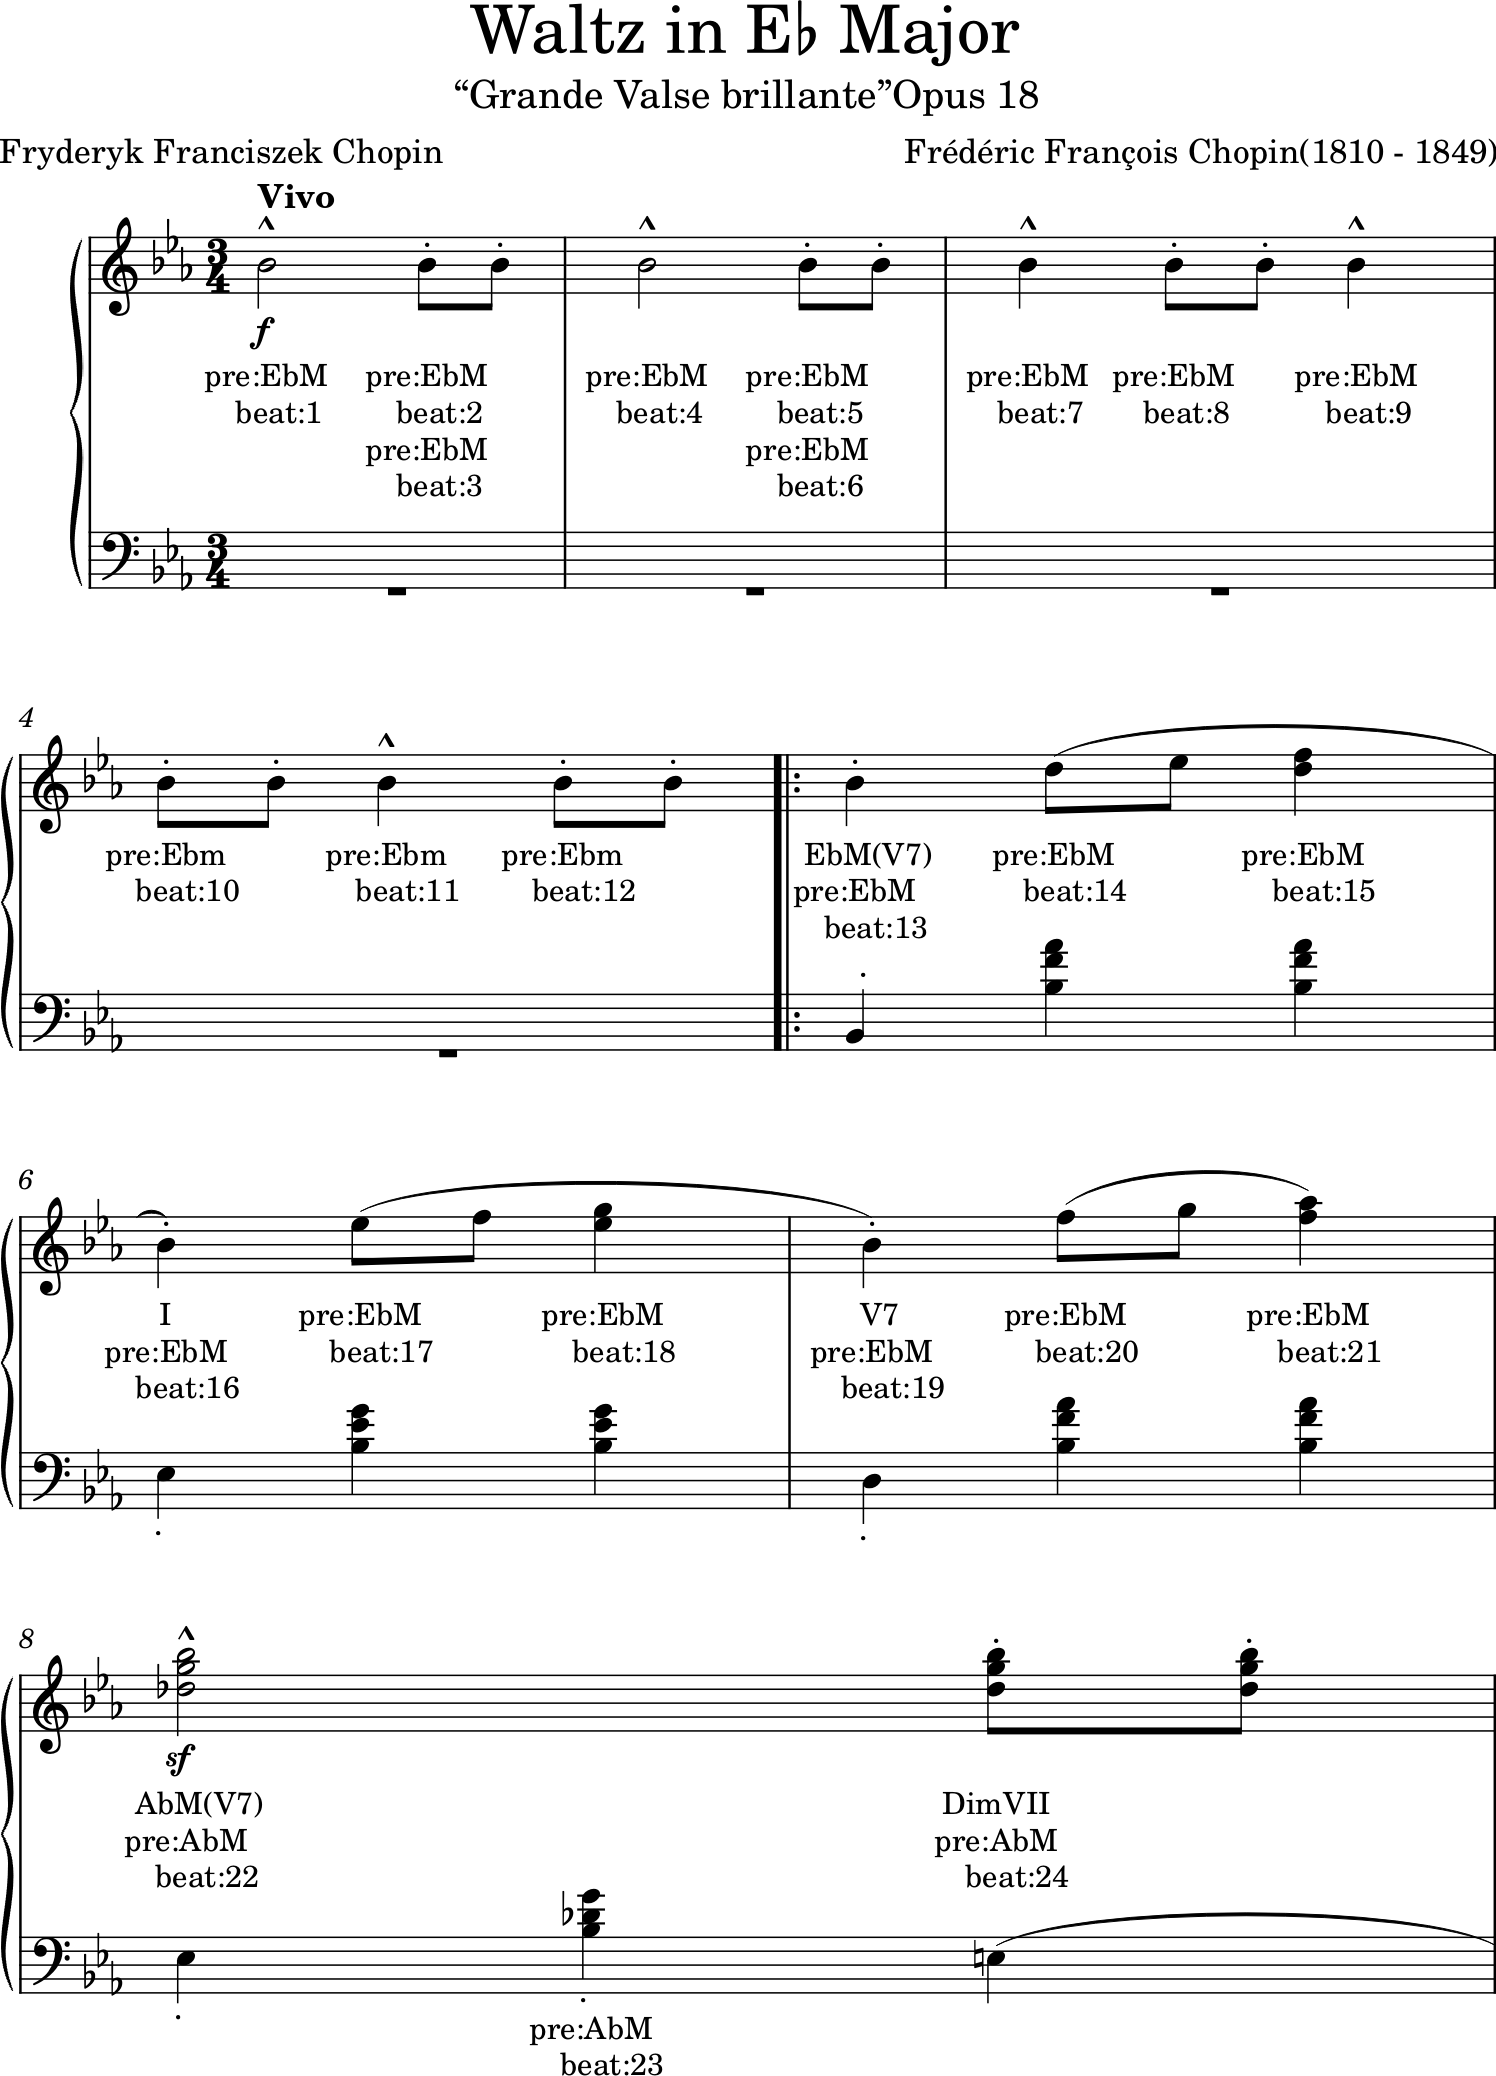

In [39]:
c.show()

In [40]:
c.write('musicxml','out.mxl')

'C:\\Users\\good6\\Documents\\GitHub\\fyp-chord-identification\\jupyter_notebook_playground\\out.xml'